## <b><font color='#800000'>Recommendation Engine for Online Bookstore</font> <b>

#### Importing libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re

import seaborn as sns
from sklearn import metrics
import plotly.express as px
sns.set(rc = {'figure.figsize':(15,8)})

warnings.simplefilter('ignore')

In [2]:
#reading the data
books_df = pd.read_excel('Final Assignment - Week 9.xlsx')

#### Understanding the data and performing initial sanity checks

In [3]:
books_df.head()

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,Unnamed: 66,Unnamed: 67,"Dear Greg,"
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0,NaN,NaN,I wanted to find something that the students c...
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,"I have data from American Science and Surplus,..."
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,...,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0,NaN,NaN,NaN


In [4]:
books_df.shape 

(33713, 69)

In [5]:
#understanding the data types and table structure
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33713 entries, 0 to 33712
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                33713 non-null  int64  
 1   logtarg           8311 non-null   float64
 2   r                 33713 non-null  int64  
 3   f                 33713 non-null  int64  
 4   m                 33713 non-null  float64
 5   tof               33713 non-null  int64  
 6   Ffiction1         33713 non-null  int64  
 7   Fclassics3        33713 non-null  int64  
 8   Fcartoons5        33713 non-null  int64  
 9   Flegends6         33713 non-null  int64  
 10  Fphilosophy7      33713 non-null  int64  
 11  Freligion8        33713 non-null  int64  
 12  Fpsychology9      33713 non-null  int64  
 13  Flinguistics10    33713 non-null  int64  
 14  Fart12            33713 non-null  int64  
 15  Fmusic14          33713 non-null  int64  
 16  Ffacsimile17      33713 non-null  int64 

In [6]:
#the data does not look very clean
#checking for null or missing values
books_df.isnull().sum()

id                 0
logtarg        25402
r                  0
f                  0
m                  0
               ...  
Mvideos50          0
Mnonbooks99        0
Unnamed: 66    33713
Unnamed: 67    33713
Dear Greg,     33709
Length: 69, dtype: int64

In [7]:
#dropping columns with nulls as they are irrelevant to our problem
books_df = books_df.drop(['Unnamed: 66','Unnamed: 67','Dear Greg,','logtarg'],axis=1,inplace=False)

In [8]:
#checking for duplicates
books_df.duplicated().sum()

0

### <font color='#800000'>1. Performing descriptive statistics on all variables to understand the data, the distributions and basic info</font>

In [9]:
books_df.describe()

,id,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
count,3.371300e+04,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,...,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000
mean,8.234209e+06,508.427254,5.820603,251.924325,1296.088186,0.590900,0.228102,0.356480,0.104767,0.290659,...,29.095301,4.223431,21.147507,0.305226,0.020681,6.785558,3.728635,8.402428,6.020431,1.800973
std,4.426015e+06,542.440039,7.008049,3929.929826,818.976321,1.762201,0.865510,1.105653,0.527764,1.088606,...,2087.221131,19.975164,2898.452008,1.991675,0.501499,21.197488,15.007592,46.021881,19.643978,21.383867
min,9.140000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.391616e+06,117.000000,1.000000,39.899994,536.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.967691e+06,293.000000,3.000000,102.629944,1311.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.199823e+07,712.000000,7.000000,247.297485,2132.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,18.899994,0.000000,2.500000,0.000000,0.000000,5.112919,0.000000,0.000000,0.000000,0.000000
max,1.625264e+07,2460.000000,118.000000,532892.000000,2462.000000,109.000000,29.000000,49.000000,22.000000,35.000000,...,383154.500000,820.563477,532182.000000,78.724670,21.448685,771.610840,735.354980,1999.150391,794.137695,2412.960938


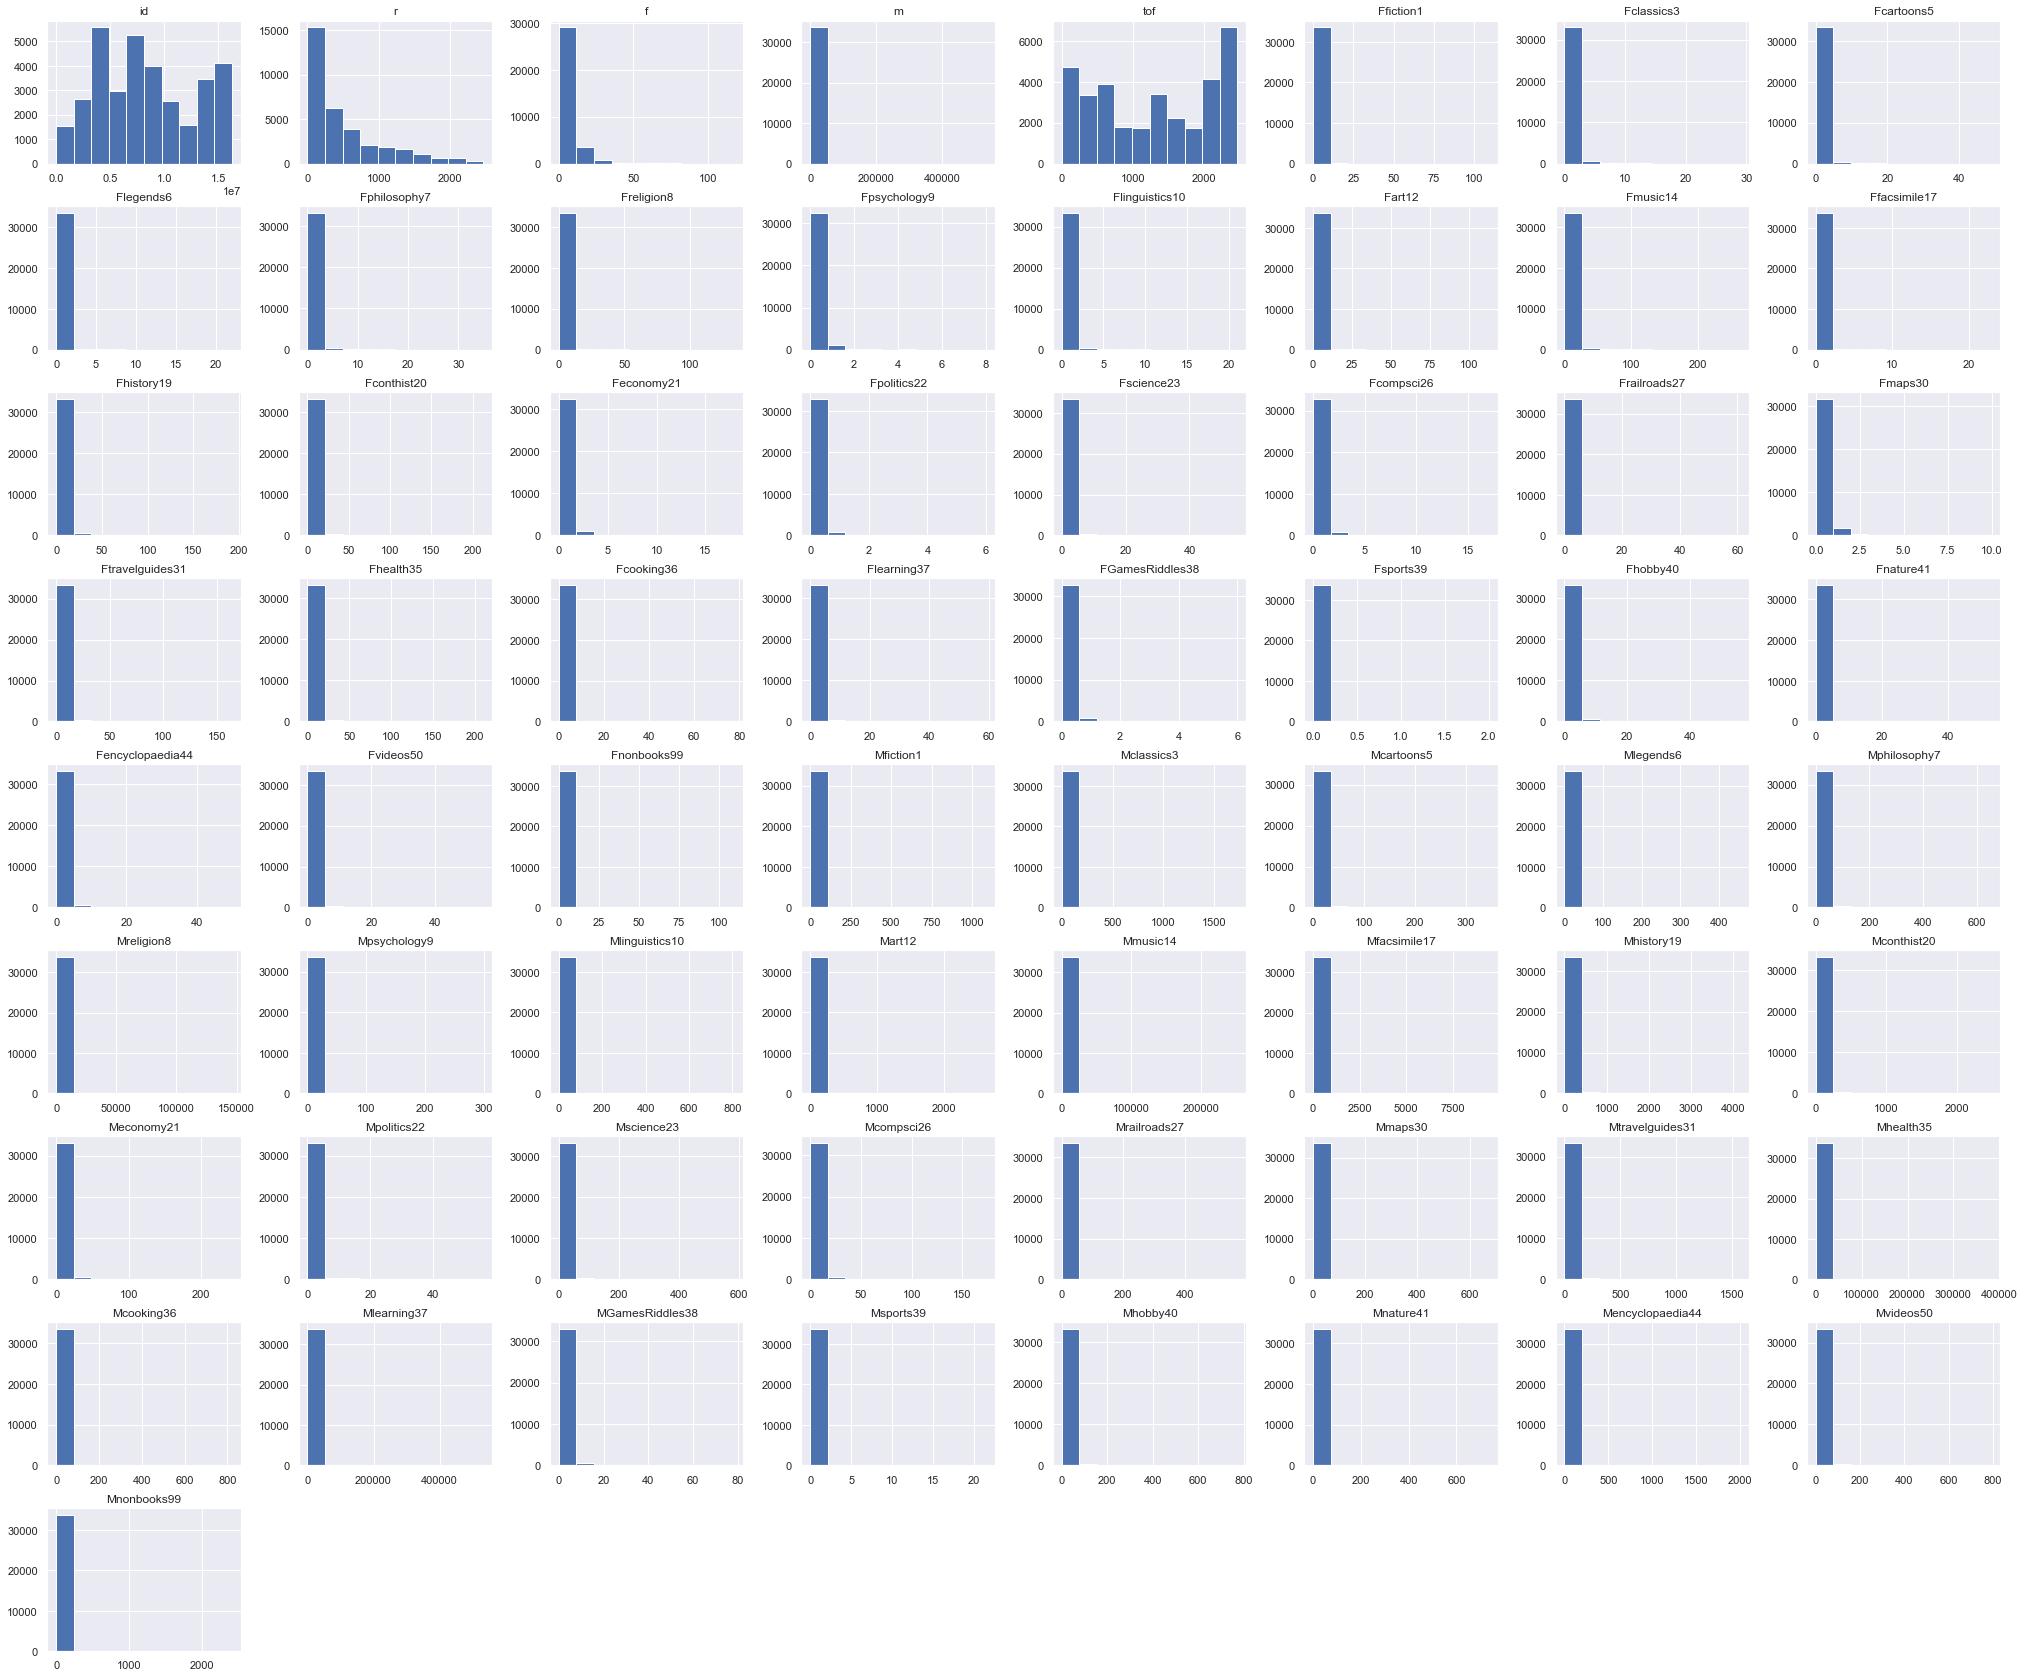

In [10]:
fig = plt.figure(figsize=(35,30));
ax = fig.gca() 
books_df.hist(ax=ax) 
pass

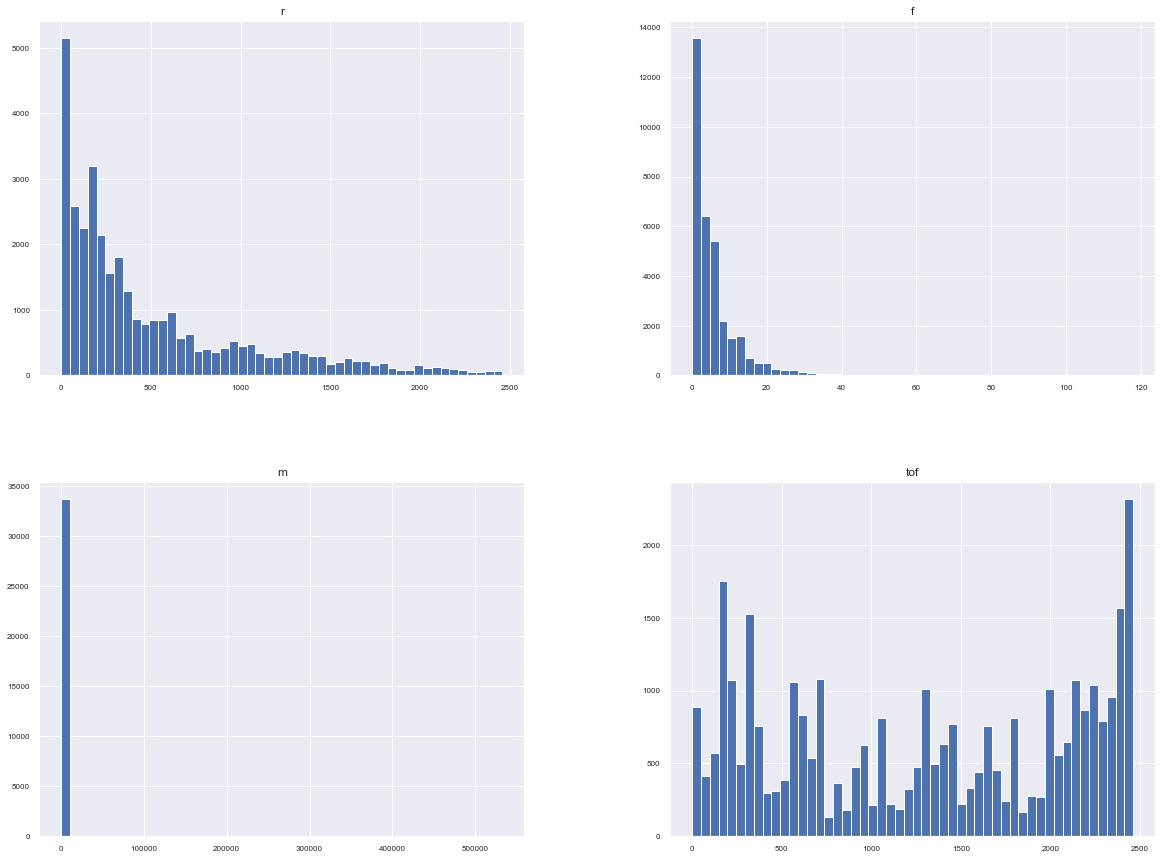

In [11]:
# we can get a clearer picture of the variables with a significant pattern

# r = recency, smaller number is most recent
# f = frequency, higher number is more shopped
# m = monetary, more $ spent
# tof = time on file, higher number is longer customer


books_df[['r','f','m','tof']].hist(figsize=(20, 15), bins=50, xlabelsize=8, ylabelsize=8)
pass

### <font color='#800000'>2. Creating a new data set with more descriptive labels and the data needed for analysis</font>

In [12]:
# We know the following about the data :

# F_ are frequency variables
# M_ are monetory values in $

col = list(books_df.columns)
def relabel_data(col):
    for i in range(len(col)):
        if col[i] == 'r':
            col[i] = 'Recency'
        elif col[i] == 'f':
            col[i] = 'Frequency'
        elif  col[i] == 'm':
            col[i] = 'Monetary'
        elif  col[i] == 'tof':
            col[i] = 'Time on File in days'
        elif  col[i][0] == 'F':
            col[i] = 'Count: ' + col[i] [1:]
            col[i] = re.sub(r'\d+', ' books', col[i]) if 'nonbooks' not in col[i] else re.sub(r'\d+', '', col[i])
        elif  col[i][0] == 'M':
            col[i] = 'Sales: ' + col[i] [1:]
            col[i] = re.sub(r'\d+', ' books', col[i]) if 'nonbooks' not in col[i] else re.sub(r'\d+', '', col[i])

    return col
            
books_df.columns = relabel_data(col)   
books_df.head()

,id,Recency,Frequency,Monetary,Time on File in days,Count: fiction books,Count: classics books,Count: cartoons books,Count: legends books,Count: philosophy books,...,Sales: health books,Sales: cooking books,Sales: learning books,Sales: GamesRiddles books,Sales: sports books,Sales: hobby books,Sales: nature books,Sales: encyclopaedia books,Sales: videos books,Sales: nonbooks
0,914,194,7,318.894775,1703,1,0,1,0,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,3,14,368.052246,2364,1,0,2,0,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,1489,15,423.298340,2371,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,155,4,71.217041,1290,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,194,6,442.638184,2188,0,0,1,0,3,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


In [13]:
#removing outliers if any before we proceed with modelling

def remove_outliers(df, columns):
    int_df = df
    for x in int_df[columns]:
        int_df = int_df[int_df[x] < df[x].quantile(0.99)]
    return int_df

books_df_updated = remove_outliers(books_df, ['Recency','Frequency','Monetary'])
books_df_updated

,id,Recency,Frequency,Monetary,Time on File in days,Count: fiction books,Count: classics books,Count: cartoons books,Count: legends books,Count: philosophy books,...,Sales: health books,Sales: cooking books,Sales: learning books,Sales: GamesRiddles books,Sales: sports books,Sales: hobby books,Sales: nature books,Sales: encyclopaedia books,Sales: videos books,Sales: nonbooks
0,914,194,7,318.894775,1703,1,0,1,0,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,3,14,368.052246,2364,1,0,2,0,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,1489,15,423.298340,2371,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,155,4,71.217041,1290,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,194,6,442.638184,2188,0,0,1,0,3,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33708,16061594,6,1,0.000000,6,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
33709,16062701,4,1,0.000000,4,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
33710,16062981,5,1,22.949997,5,0,0,3,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
33711,16063490,0,0,0.000000,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0


#### The data is clean with relevant columns and no missing values, duplicates or outliers

### <font color='#800000'>6. Choose either a “supervised” or an “unsupervised” approach to segment/cluster current customers using the data provided.<font>

### Analysing of RFM Metrics

In [14]:
rfm = books_df[['id','Recency', 'Frequency','Monetary']]
rfm = rfm.set_index('id')

rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,33713.0,508.427254,542.440039,0.0,117.000000,293.000000,712.000000,2460.0
Frequency,33713.0,5.820603,7.008049,0.0,1.000000,3.000000,7.000000,118.0
Monetary,33713.0,251.924325,3929.929826,0.0,39.899994,102.629944,247.297485,532892.0


### Calculating RFM scores

#### Based on the fact that high recency is bad, while high frequency and monetary value is good, we will assign scores to the customers
#### We then compute the combined RFM score and RFM segment of each customer, using which we can assign different segment names to each cluster

In [15]:
# Define rfm_level function
def rfm_func(rfm_df) : 
    def rfm_level(df):
        if df['RFMSegment'] == '444':
            return "Best Customers"
        elif (df['frequency_score']==4) :
            return 'Loyal Customers'
        elif (df['monetary_score']==4):
            return 'Big Spenders'
        elif (df['RFMSegment']=='244'):
            return 'Almost Lost'
        elif (df['RFMSegment']=='144'):
            return 'Promising'
        elif (df['RFMSegment']=='111'):
            return 'Needs Attention'
        else:
            return 'Require Activation'
    #No. of days since customer's last purchase. The nearest date gets 4 and the furthest date gets 1.
    rfm_df["recency_score"] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])
    # Total number of purchases. The least frequency gets 1 and the maximum frequency gets 4.
    rfm_df["frequency_score"] = pd.qcut(rfm_df["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])
    #Total spend by the customer. The least money gets 1, the most money gets 4.
    rfm_df["monetary_score"]= pd.qcut(rfm_df["Monetary"],4,labels=[1,2,3,4])

    rfm_df['RFMSegment'] = rfm_df.recency_score.astype(str) \
                            + rfm_df.frequency_score.astype(str) \
                            + rfm_df.monetary_score.astype(str)
    rfm_df['RFMScore'] = rfm_df[['recency_score','frequency_score','monetary_score']].sum(axis=1)
    # Create a new variable RFM_Level
    rfm_df['RFMLevel'] = rfm_df.apply(rfm_level, axis=1)
    return rfm_df

    
rfm = rfm_func(rfm)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFMSegment,RFMScore,RFMLevel
id,,,,,,,,,
914,194,7,318.894775,3,3,4,334,10,Big Spenders
957,3,14,368.052246,4,4,4,444,12,Best Customers
1406,1489,15,423.298340,1,4,4,144,9,Loyal Customers
1414,155,4,71.217041,3,3,2,332,8,Require Activation
1546,194,6,442.638184,3,3,4,334,10,Big Spenders


### Descriptive statistics of Segments

In [16]:
rfm[["RFMLevel", "Recency","Frequency","Monetary"]].groupby("RFMLevel").agg(["mean","count","max"]).round()

Recency              Frequency             Monetary         \
                      mean  count   max      mean  count  max     mean  count   
RFMLevel                                                                        
Best Customers        46.0   2706   117      19.0   2706  118    997.0   2706   
Big Spenders         553.0   2051  2427       5.0   2051    7    527.0   2051   
Loyal Customers      390.0   5722  2162      13.0   5722   70    520.0   5722   
Needs Attention     1460.0   1659  2460       1.0   1659    1     19.0   1659   
Require Activation   520.0  21575  2460       3.0  21575    7     79.0  21575   

                              
                         max  
RFMLevel                      
Best Customers      532892.0  
Big Spenders        252743.0  
Loyal Customers     383350.0  
Needs Attention         40.0  
Require Activation     247.0

### Creating sample data (5-10 records) with synthetic data to show how a new transaction will be scored and assigned to a segment/cluster.


In [17]:
data = {'id':[1,2,3,4,5,6,7,8,9,10],
        'Recency':[20, 21, 19, 18, 12, 24, 48, 64, 56, 78],
        'Frequency':[128, 46, 100, 57, 69, 91, 21, 19, 47, 96],
        'Monetary':[2468, 135, 77, 128, 3102, 2577, 408, 124, 99, 55]}

rfm_segmentation_df = pd.DataFrame(data)
rfm_segmentation_df

,id,Recency,Frequency,Monetary
0,1,20,128,2468
1,2,21,46,135
2,3,19,100,77
3,4,18,57,128
4,5,12,69,3102
5,6,24,91,2577
6,7,48,21,408
7,8,64,19,124
8,9,56,47,99
9,10,78,96,55


In [18]:
rfm_segmentation_df = rfm_func(rfm_segmentation_df)
rfm_segmentation_df[['id', 'RFMLevel']]

,id,RFMLevel
0,1,Loyal Customers
1,2,Require Activation
2,3,Loyal Customers
3,4,Require Activation
4,5,Big Spenders
5,6,Big Spenders
6,7,Require Activation
7,8,Require Activation
8,9,Require Activation
9,10,Loyal Customers


### <font color='#800000'>Recommendations for each customer segment<font>

<b>Best customers</b> are our recent, frequent and highly paying customer. We should recommend more expensive books from popular categories to these customers as there is a higher probability of conversion with these customers. 

<b>Loyal customers</b> can be motivated to add higher order value items to their cart. They know your products, prices, and promotions better than the others because they visit your site often and engage with your brand. Personalised recommendations on their favourite book categories with no discounts can be made to these customers.

We can keep these customers interested by setting up reward and loyalty programs to increase retention and hold onto these customers. 

<b>Big spenders</b> are the most important target customer segment. We can focus on making them Best customers by giving them early access to new books, special editions and hardcovers. Since they are big spenders, we can focus on increasing basket value by offering special bundles and value-packs in order to increase AOV.

Customers in the <b>Almost lost</b> and <b>Promising</b> segments are potential customers who need to be reminded of the brand. Short-term discounts on relevant book categories based on their previous purchases can be made via email or targetted ads to remind these customers of our brand and allow them to shop again.


Infrequent customers from the <b>Require Activation</b> group need to be drawn to the store. We can give them a  discounted popular item or use wishlists to create personalized limited-time sales to create urgency and make a sale. These customers can be kept engaged by sending out emails when new books come out from their favourite authors and can be notified of price-drops on relevant categories in order to drive repeat orders.
